## Phase II (deadline: Sunday, December 20th) Final submission (70 pts): Each student is expected to submit two files:
#### 1. A Word file that describes the findings of this project and explans how the data supports your claims. This document is expected to be understandable for people without special knowledge in data science. You most likely need to include figures and tables to illustrate what you learned from the data set.
#### 2. A Jupyter notebook file that contains complete code for generating the results. In particular, it should include the following components:
a) Load, and explore the data set

b) Handle missing data and outliers

c) Extract useful information from the data

d) Create figures or numerical summaries of the data

#### The final project will be marked according to the following aspects:
1. The goal of the project is defined clearly.
2. The data set is closely related to the project.
3. Data processing techniques are applied reasonably.
4. Useful information (such as graphs and statistics) are correctly extracted from the data set.
5. The project report is written clearly.
6. The findings are well supported by the data.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 

In [2]:
df = pd.read_csv("Data/NYPD_Hate_Crimes.csv", sep = ",")
df

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
0,2.019050e+14,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,NaN,02/08/2019,B19606200
1,2.019050e+14,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610772
2,2.019050e+14,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
3,2.019050e+14,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
4,2.019040e+14,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-ISLAMIC(MUSLIM),Religion/Religious Practice,NaN,05/10/2019,B19620156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,2.020120e+14,2020,9,09/03/2020,120,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color,NaN,NaN,NaN
648,2.020120e+14,2020,6,06/23/2020,121,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
649,2.020120e+14,2020,7,07/04/2020,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
650,2.020120e+14,2020,6,07/08/2020,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-WHITE,Race/Color,NaN,NaN,NaN


In [3]:
# Checking the amount of nulls in each feature
df.isna().sum()

Full Complaint ID                  0
Complaint Year Number              0
Month Number                       0
Record Create Date                 0
Complaint Precinct Code            0
Patrol Borough Name                0
County                             0
Law Code Category Description      0
Offense Description                0
PD Code Description                0
Bias Motive Description            3
Offense Category                   0
Other Motive Description         652
Arrest Date                      467
Arrest Id                        467
dtype: int64

In [4]:
#df = df.drop('Other Motive Description', axis = 1)
#df = df.drop('Arrest Data', axis = 1)
#df = df.drop('Arrest Id', axis = 1)
# Dropping the features that have a majority of missing values 
df = df.drop(df.columns[[0, 12, 13, 14]], axis = 1)
df

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
0,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation
1,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
2,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
3,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
4,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-ISLAMIC(MUSLIM),Religion/Religious Practice
...,...,...,...,...,...,...,...,...,...,...,...
647,2020,9,09/03/2020,120,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color
648,2020,6,06/23/2020,121,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
649,2020,7,07/04/2020,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
650,2020,6,07/08/2020,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-WHITE,Race/Color


In [5]:
df.loc[df.isnull().any(axis=1)] 
# These are rows that still have null values after the deleting of NaN majority columns

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
147,2019,12,12/24/2019,17,PATROL BORO MAN SOUTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,NaN,Unclassified
211,2019,8,07/07/2020,9,PATROL BORO MAN SOUTH,NEW YORK,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",NaN,Unclassified
236,2019,1,07/03/2020,14,PATROL BORO MAN SOUTH,NEW YORK,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,NaN,Unclassified


In [6]:
# Dropping the rows that contained the missing values. 
df = df.drop(df.index[147])
df = df.drop(df.index[211])
df = df.drop(df.index[236])
df

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
0,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation
1,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
2,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
3,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
4,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-ISLAMIC(MUSLIM),Religion/Religious Practice
...,...,...,...,...,...,...,...,...,...,...,...
647,2020,9,09/03/2020,120,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color
648,2020,6,06/23/2020,121,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
649,2020,7,07/04/2020,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
650,2020,6,07/08/2020,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-WHITE,Race/Color


In [7]:
# Specifically filter the dataframe to be related to my project, which is 'Anti-asian'
asian_df = df.loc[df['Bias Motive Description'] == 'ANTI-ASIAN']
asian_df

,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
14,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color
15,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color
16,2020,3,03/28/2020,44,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color
20,2020,7,07/31/2020,40,PATROL BORO BRONX,BRONX,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-ASIAN,Race/Color
23,2019,1,01/15/2019,61,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MURDER & NON-NEGL. MANSLAUGHTE,"MURDER,UNCLASSIFIED",ANTI-ASIAN,Race/Color
81,2020,3,03/20/2020,66,PATROL BORO BKLYN SOUTH,KINGS,FELONY,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PERSONAL ELECTRONIC ...",ANTI-ASIAN,Race/Color
82,2020,3,03/24/2020,78,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-ASIAN,Race/Color
85,2020,3,03/25/2020,84,PATROL BORO BKLYN NORTH,KINGS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-ASIAN,Race/Color
86,2020,3,03/25/2020,84,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-ASIAN,Race/Color
138,2020,3,03/10/2020,23,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-ASIAN,Race/Color


In [42]:
asian_df['Complaint Year Number'].value_counts()

2020    26
2019     1
Name: Complaint Year Number, dtype: int64

In [43]:
# I made this specific dataframe just for the breakdown graph of non-asian to asian hate crimes committed per month
filter_df = df[['Complaint Year Number', 'Month Number', 'Bias Motive Description']] #.copy()
filter_df['is_asian'] = np.where(filter_df['Bias Motive Description'] == 'ANTI-ASIAN', 'asian', 'non-asian')
filter_df = filter_df.loc[filter_df['Complaint Year Number'] == 2020]

filter_df

C:\Users\Frankenstein\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Complaint Year Number,Month Number,Bias Motive Description,is_asian
13,2020,2,ANTI-MALE HOMOSEXUAL(GAY),non-asian
14,2020,3,ANTI-ASIAN,asian
15,2020,3,ANTI-ASIAN,asian
16,2020,3,ANTI-ASIAN,asian
17,2020,4,ANTI-JEWISH,non-asian
...,...,...,...,...
647,2020,9,ANTI-BLACK,non-asian
648,2020,6,ANTI-JEWISH,non-asian
649,2020,7,ANTI-JEWISH,non-asian
650,2020,6,ANTI-WHITE,non-asian


In [9]:
# These were made in order to make manipulating and graphing the 2020 data easier. 
firstyear_df = asian_df.loc[asian_df['Complaint Year Number'] == 2019]
secondyear_df = asian_df.loc[asian_df['Complaint Year Number'] == 2020]

In [10]:
!pip install seaborn==0.10.1

In [11]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [13]:
asian_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 14 to 634
Data columns (total 11 columns):
Complaint Year Number            27 non-null int64
Month Number                     27 non-null int64
Record Create Date               27 non-null object
Complaint Precinct Code          27 non-null int64
Patrol Borough Name              27 non-null object
County                           27 non-null object
Law Code Category Description    27 non-null object
Offense Description              27 non-null object
PD Code Description              27 non-null object
Bias Motive Description          27 non-null object
Offense Category                 27 non-null object
dtypes: int64(3), object(8)
memory usage: 2.5+ KB


In [14]:
df['Bias Motive Description'].value_counts()

ANTI-JEWISH                          337
ANTI-MALE HOMOSEXUAL(GAY)             66
ANTI-BLACK                            66
ANTI-WHITE                            38
ANTI-ASIAN                            27
ANTI-TRANSGENDER                      17
ANTI-ISLAMIC(MUSLIM)                  16
ANTI-OTHER ETHNICITY                  14
ANTI-CATHOLIC                         14
ANTI-LGBT(MIXED GROUP)                13
ANTI-FEMALE HOMOSEXUAL(GAY)            9
ANTI-HISPANIC                          8
ANTI-ARAB                              6
ANTI-MULTI RACIAL GROUPS               3
ANTI-OTHER RELIGION                    2
ANTI-BUDDHIST                          2
ANTI-HINDU                             2
ANTI-RELIGIOUS PRACTICE GENERALLY      2
ANTI-GENDER NON CONFORMING             2
ANTI-PHYSICAL DISABILITY               1
50 YEARS OLD OR MORE                   1
ANTI-JEHOVAS WITNESS                   1
Name: Bias Motive Description, dtype: int64

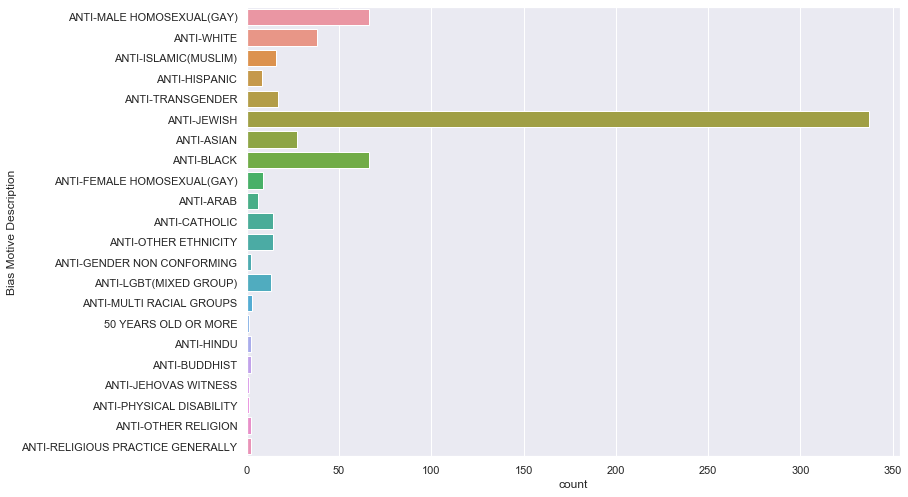

In [15]:
sns.countplot(y="Bias Motive Description", data=df)

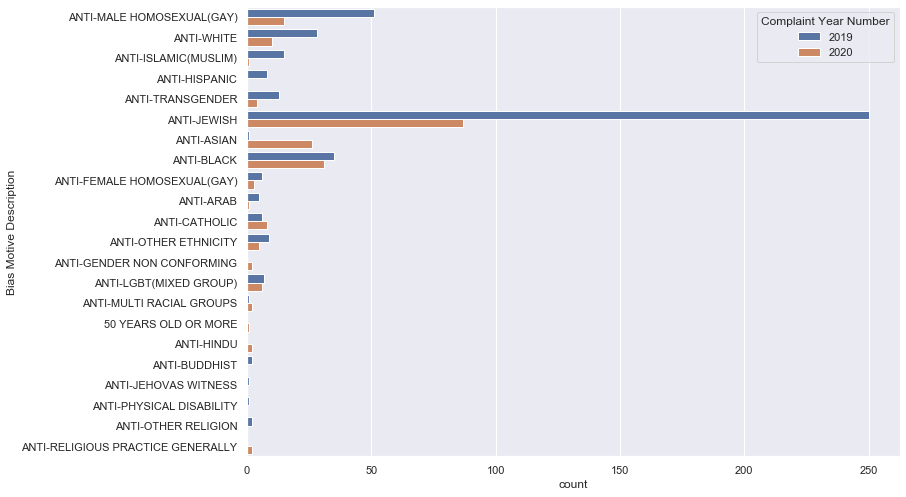

In [16]:
sns.countplot(y="Bias Motive Description", hue="Complaint Year Number", data=df)

So from the second graph, we can already see a major difference with the amoutn of hate crimes. It looks like they're the only label that has a significant jump from the 2019 to 2020 numbers.

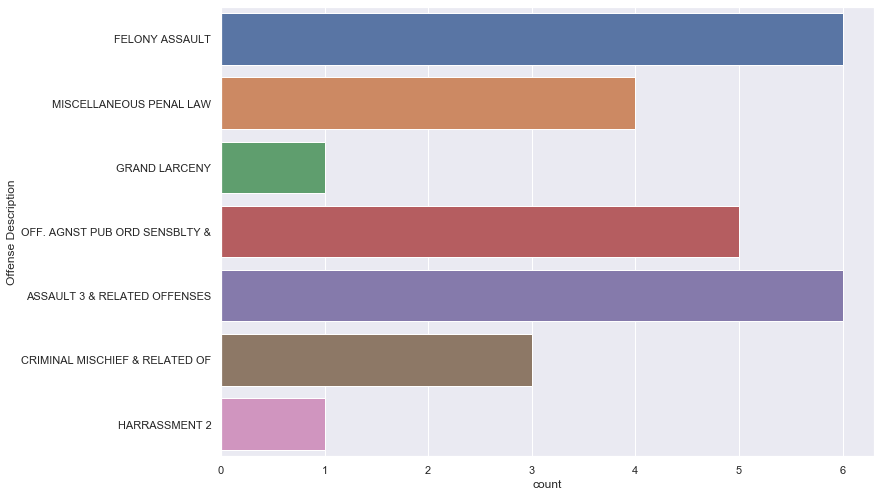

In [45]:
sns.countplot(y="Offense Description", data=secondyear_df)

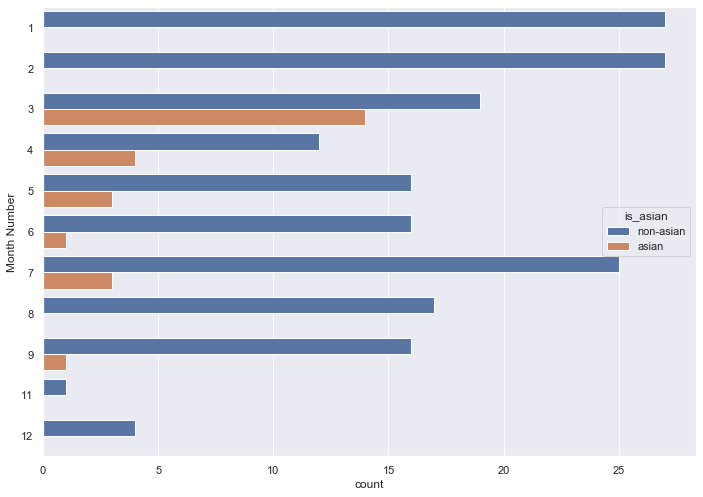

In [44]:
sns.countplot(y="Month Number", hue="is_asian", data=filter_df)

## Geospatial Prep and Mapping

In [26]:
import folium 
import numpy as np
import pandas as pd
import shapefile as shp
folium.__version__

'0.11.0'

In [28]:
secondyear_df['Patrol Borough Name'].value_counts()

PATROL BORO MAN SOUTH        11
PATROL BORO BRONX             4
PATROL BORO MAN NORTH         3
PATROL BORO QUEENS NORTH      3
PATROL BORO BKLYN NORTH       2
PATROL BORO BKLYN SOUTH       2
PATROL BORO STATEN ISLAND     1
Name: Patrol Borough Name, dtype: int64

In [29]:
secondyear_df['Complaint Precinct Code'].value_counts()

13     3
44     3
14     2
23     2
84     2
17     2
112    2
6      2
24     1
120    1
111    1
78     1
40     1
7      1
5      1
66     1
Name: Complaint Precinct Code, dtype: int64

In [41]:
nyc = folium.Map(location=[40.7128, -74.0060],
                 zoom_start=10)

# Circle 13th on the map
thirteenth = folium.Circle(location=[40.736950667234254, -73.98289717304328],
                    radius=1000,
                    popup="13th",
                    color="red")
thirteenth.add_to(nyc)

# Circle 17th on the map
seventeenth = folium.Circle(location=[40.75687992019722, -73.9707428868745],
                    radius=1000,
                    popup="17th",
                    color="orange")
seventeenth.add_to(nyc)

# Circle 112th on the map
onetwelfth = folium.Circle(location=[40.72257994842322, -73.85139759852377],
                    radius=1000,
                    popup="112th",
                    color="orange")
onetwelfth.add_to(nyc)

# Circle 6th on the map
sixth = folium.Circle(location=[40.734359189827636, -74.005453202216],
                    radius=1000,
                    popup="6th",
                    color="orange")
sixth.add_to(nyc)

# Circle 120th on the map
onetwentyth = folium.Circle(location=[40.64480181093691, -74.07746884614356],
                    radius=1500,
                    popup="120th",
                    color="yellow")
onetwentyth.add_to(nyc)

# Circle 111th on the map
oneeleventh = folium.Circle(location=[40.76041473641074, -73.76778090196508],
                    radius=1000,
                    popup="111th",
                    color="yellow")
oneeleventh.add_to(nyc)

# Circle 78th on the map
seventyeighth = folium.Circle(location=[40.68069862327882, -73.9741762442965],
                    radius=1000,
                    popup="78th",
                    color="yellow")
seventyeighth.add_to(nyc)

# Circle 40th on the map
fortyth = folium.Circle(location=[40.81058550954995, -73.92532558846955],
                    radius=1000,
                    popup="40th",
                    color="yellow")
fortyth.add_to(nyc)

# Circle 7th on the map
seventh = folium.Circle(location=[40.716484625830695, -73.98403744429575],
                    radius=1000,
                    popup="7th",
                    color="yellow")
seventh.add_to(nyc)

# Circle 5th on the map
fifth = folium.Circle(location=[40.716356817557795, -73.99741625779012],
                    radius=1000,
                    popup="5th",
                    color="yellow")
fifth.add_to(nyc)

# Circle 44th on the map
fourtyfourth = folium.Circle(location=[40.837407007057784, -73.91991863079856],
                    radius=1000,
                    popup="44th",
                    color="red")
fourtyfourth.add_to(nyc)

# Circle 66th on the map
sixtysixth = folium.Circle(location=[40.625859552518406, -73.99141408847369],
                    radius=1000,
                    popup="66th",
                    color="yellow")
sixtysixth.add_to(nyc)


# Circle 23rd on the map
twentythird = folium.Circle(location=[40.78939257697182, -73.94713107128298],
                    radius=1000,
                    popup="23rd",
                    color="orange")
twentythird.add_to(nyc)

# Circle 24th on the map
twentyfourth = folium.Circle(location=[40.79670903159529, -73.96741027497535],
                    radius=1000,
                    popup="24th",
                    color="yellow")
twentyfourth.add_to(nyc)

# Circle 84th on the map
eightyfourth = folium.Circle(location=[40.695763641709476, -73.98286325804116],
                    radius=1000,
                    popup="84th",
                    color="orange")
eightyfourth.add_to(nyc)

# Circle Midtown South Precinct(14th) on the map
midtownsouth = folium.Circle(location=[40.754049798121436, -73.99480937128375],
                    radius=1000,
                    popup="Midtown South",
                    color="orange")
midtownsouth.add_to(nyc)



nyc

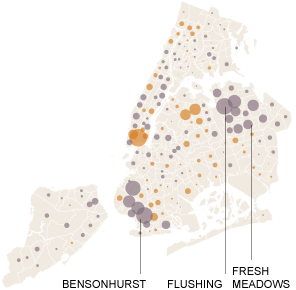

Comparing the two maps, one being the map made up of the Hate Crimes categorized as "ANTI-ASIAN" in 2020 while the other being a map of NYC where asian populations are seen, we can see that the areas of these hate crimes are appearing within at most a 15 block radius from where the populations are the highest. 